In [ ]:
!pip install linearmodels

In [ ]:
%matplotlib inline
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from linearmodels.iv import IV2SLS

# Importing the Data


In [ ]:
file_path = '/content/slave_trade_QJE.dta'

# Use pandas to read the Stata file
df = pd.read_stata(file_path)

# Remove rows with any NA values
cleaned_df = df.dropna()

# Return or display the modified DataFrame
df

,isocode,country,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,colony4,...,ln_avg_oil_pop,ln_avg_all_diamonds_pop,ln_pop_dens_1400,atlantic_distance_minimum,indian_distance_minimum,saharan_distance_minimum,red_sea_distance_minimum,ethnic_fractionalization,state_dev,land_area
0,AGO,Angola,6.670766,7.967494,14.399250,0.0,0.0,0.0,1.0,0.0,...,0.643126,-1.701396,-0.024917,5.668760,6.980571,4.925892,3.872354,0.7867,0.635,1.250000
1,BDI,Burundi,6.354370,1.140843,4.451658,0.0,0.0,0.0,0.0,1.0,...,-9.210340,-6.907755,3.036856,10.626214,2.570375,3.718742,2.215324,0.2951,0.995,0.027800
2,BEN,Benin,7.187657,8.304137,13.308970,0.0,0.0,1.0,0.0,0.0,...,-3.531555,-6.907755,1.214196,5.120652,9.233961,2.834785,3.901736,0.7872,0.695,0.113000
3,BFA,Burkina Faso,6.748760,6.413822,11.724286,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-6.907755,0.908565,4.774938,9.299419,2.763519,4.239375,0.7377,0.338,0.274000
4,BWA,Botswana,8.377471,-2.302585,3.912023,0.0,1.0,0.0,0.0,0.0,...,-9.210340,2.186849,-2.075029,5.686335,5.764575,5.856533,4.299600,0.4102,0.893,0.600000
5,CAF,Central African Republic,6.472346,1.171314,8.052058,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-1.849576,-0.473905,5.642056,8.772295,2.840084,2.293167,0.8295,0.144,0.623000
6,CIV,Ivory Coast,7.189922,5.096793,10.843699,0.0,0.0,1.0,0.0,0.0,...,-3.270892,-4.228216,0.472123,4.185696,9.457085,3.353074,4.793966,0.8204,0.082,0.322000
7,CMR,Cameroon,7.016610,4.944928,10.331063,0.0,0.0,1.0,0.0,0.0,...,-0.871162,-6.907755,1.020704,5.642056,8.772295,3.002548,3.051031,0.8635,0.316,0.475000
8,COG,Congo,7.702556,5.623267,12.391068,0.0,0.0,1.0,0.0,0.0,...,1.000878,-6.907755,-0.360961,5.527229,7.923528,3.697363,3.227007,0.8747,0.536,0.342000
9,COM,Comoros,6.364751,-2.302585,3.912023,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-6.907755,-2.302585,10.130652,1.754229,4.845693,2.609506,0.0000,1.000,0.002170


DATA

In [ ]:
# Load the .dta file
dta_path = '/content/slave_trade_QJE.dta'
df = pd.read_stata(dta_path)

# Remove rows with any NA values
cleaned_df = df.dropna()

# Display the first few rows to verify it's cleaned correctly
print(cleaned_df.head())

  isocode       country  ln_maddison_pcgdp2000  ln_export_area  ln_export_pop  \
0     AGO        Angola               6.670766        7.967494      14.399250   
1     BDI       Burundi               6.354370        1.140843       4.451658   
2     BEN         Benin               7.187657        8.304137      13.308970   
3     BFA  Burkina Faso               6.748760        6.413822      11.724286   
4     BWA      Botswana               8.377471       -2.302585       3.912023   

   colony0  colony1  colony2  colony3  colony4  ...  ln_avg_oil_pop  \
0      0.0      0.0      0.0      1.0      0.0  ...        0.643126   
1      0.0      0.0      0.0      0.0      1.0  ...       -9.210340   
2      0.0      0.0      1.0      0.0      0.0  ...       -3.531555   
3      0.0      0.0      1.0      0.0      0.0  ...       -9.210340   
4      0.0      1.0      0.0      0.0      0.0  ...       -9.210340   

   ln_avg_all_diamonds_pop  ln_pop_dens_1400  atlantic_distance_minimum  \
0          

In [ ]:
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area', 'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'atlantic_distance_minimum', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'ethnic_fractionalization', 'state_dev', 'land_area']


# Regression Chart ⭐⭐⭐⭐⭐

In [ ]:
# Load the .dta file
dta_path = '/content/slave_trade_QJE.dta'
df = pd.read_stata(dta_path)

# Define independent variables and check for missing columns
independent_vars_1 = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]
# Accessing independent variables and dependent variable
X = df[independent_vars_1]
X = sm.add_constant(X)
y = df['ln_maddison_pcgdp2000']

# Fit the model
model1 = sm.OLS(y, X).fit()

#display details of the fit
print(model1.summary())


                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.759
Model:                               OLS   Adj. R-squared:                  0.603
Method:                    Least Squares   F-statistic:                     4.879
Date:                   Wed, 03 Apr 2024   Prob (F-statistic):           4.36e-05
Time:                           15:09:18   Log-Likelihood:                -26.309
No. Observations:                     52   AIC:                             94.62
Df Residuals:                         31   BIC:                             135.6
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# First Stage Regression

In [ ]:
# Load the .dta file
dta_path = '/content/slave_trade_QJE.dta'
df = pd.read_stata(dta_path)

# Assuming 'oil_discovery' is an instrumental variable for 'ln_avg_oil_pop'
# First Stage: Predicting 'ln_avg_oil_pop'
first_stage_vars = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]
X_first_stage = df[first_stage_vars]
X_first_stage = sm.add_constant(X_first_stage)
y_first_stage = df['ln_avg_oil_pop']

# Fit the first stage model
first_stage_model = sm.OLS(y_first_stage, X_first_stage).fit()

# Use the fitted model to predict the endogenous variable
df['ln_avg_oil_pop_pred'] = first_stage_model.predict(X_first_stage)


# Second Stage


In [ ]:
# Second Stage: Using the predicted 'ln_avg_oil_pop' from the first stage
independent_vars_2 = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]
X_second_stage = df[independent_vars_2]
X_second_stage = df['ln_avg_oil_pop']
y_second_stage = df['ln_maddison_pcgdp2000']

# Fit the second stage model
second_stage_model = sm.OLS(y_second_stage, X_second_stage).fit()

# Display details of the fit
print(second_stage_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     ln_maddison_pcgdp2000   R-squared (uncentered):                   0.695
Model:                               OLS   Adj. R-squared (uncentered):              0.689
Method:                    Least Squares   F-statistic:                              116.0
Date:                   Wed, 03 Apr 2024   Prob (F-statistic):                    9.71e-15
Time:                           15:15:52   Log-Likelihood:                         -145.46
No. Observations:                     52   AIC:                                      292.9
Df Residuals:                         51   BIC:                                      294.9
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

* Scatter Plots

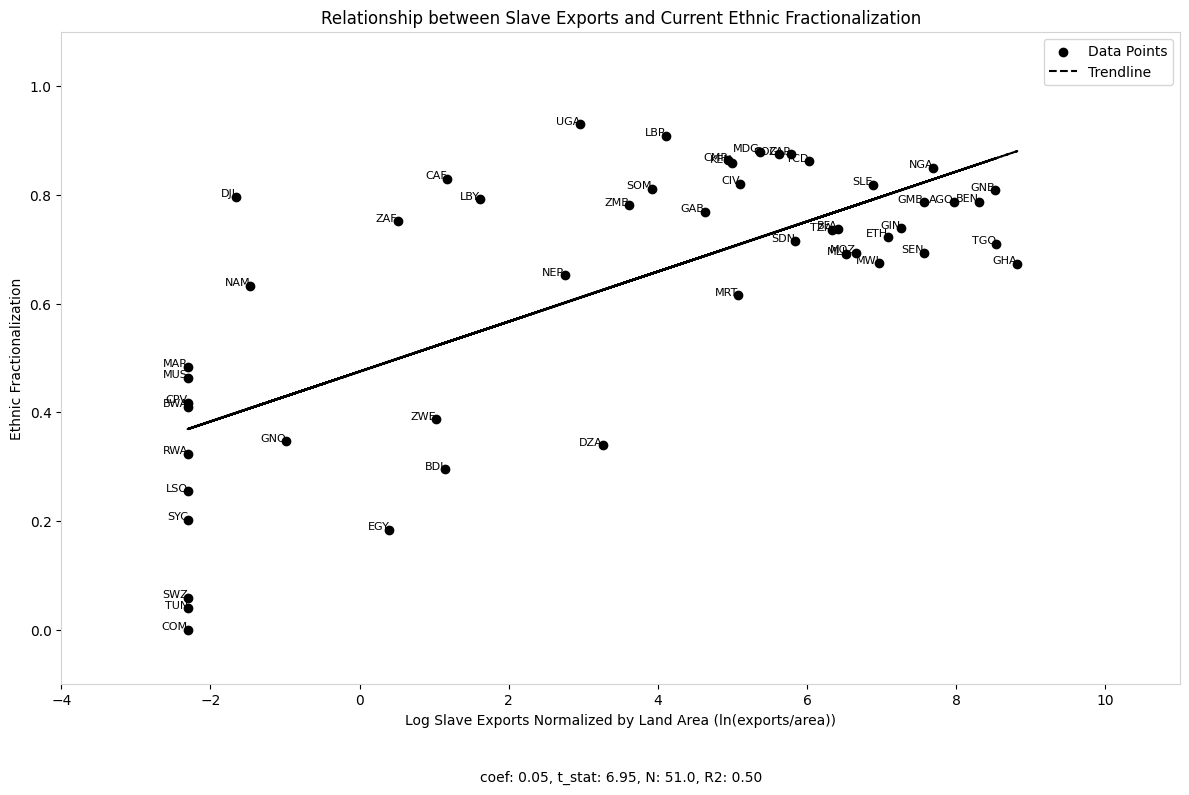

In [ ]:
# Fit OLS model
lr = smf.ols(formula="ethnic_fractionalization ~ ln_export_area", data=df).fit()

slope = lr.params[1]
intercept = lr.params[0]

# Calculate the predicted values (trendline)
predicted_values = slope * df['ln_export_area'] + intercept

plt.figure(figsize=(12, 8))

# Plot the data points
plt.scatter(df['ln_export_area'], df['ethnic_fractionalization'], color='black', label='Data Points')

# Plot the trendline
plt.plot(df['ln_export_area'], predicted_values, "k--", label='Trendline')

# Loop through the countries and plot each one with its name
for i, row in df.iterrows():
    plt.text(row['ln_export_area'], row['ethnic_fractionalization'], row['isocode'], fontsize=8, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(-4, 11)
plt.ylim(-0.1, 1.1)

# Setting the outside border to light gray
spines = plt.gca().spines
for spine in spines.values():
    spine.set_edgecolor('#D3D3D3')  # Light gray color

# Adding information about coefficients, standard errors, number of observations, and R-squared
plt.text(0.5, -0.15, f'coef: {slope:.2f}, t_stat: {lr.tvalues[1]:.2f}, N: {lr.nobs}, R2: {lr.rsquared:.2f}',
         transform=plt.gca().transAxes, fontsize=10, ha='center')

plt.title('Relationship between Slave Exports and Current Ethnic Fractionalization')
plt.xlabel('Log Slave Exports Normalized by Land Area (ln(exports/area))')
plt.ylabel('Ethnic Fractionalization')
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

# Hello

# Lasso Regression

In [ ]:
# Correcting the NaN replacement to maintain numeric data types
df.fillna(0, inplace=True)

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df = pd.read_stata('/content/slave_trade_QJE.dta')
# Ensure your feature columns do not include non-numeric data. Adjust as necessary.

feature_columns = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]

# Check each column in feature_columns if it exists in df
for col in feature_columns:
    try:
        df[col]
    except KeyError:
        print(f"Column not found: {col}")

# Dropping any non-numeric columns for Lasso, adjust the `drop` list as needed
X = df[feature_columns].select_dtypes(include=[np.number])
y = df['ln_maddison_pcgdp2000']  # Target variable

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and calculate mean squared error
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print('Coefficients:', lasso_model.coef_)

Mean Squared Error: 0.22887670993804932
Coefficients: [-0.3241629   0.         -0.          0.         -0.          0.07759286
  0.         -0.0274861   0.          0.         -0.          0.16336145
 -0.         -0.00277183  0.          0.         -0.         -0.17876635
  0.08169106  0.          0.        ]


# Double Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.read_stata('/content/slave_trade_QJE.dta')

# Dropping any non-numeric columns for Lasso, adjust the `drop` list as needed
X = df[feature_columns].select_dtypes(include=[np.number])
y = df['ln_maddison_pcgdp2000']  # Target variable

# Split the data into training and testing sets for both stages
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

# Get the model coefficients
coef = lasso_cv.coef_

# Identify variables with non-zero coefficients
selected_features = X.columns[coef != 0]

print("Selected Features:", selected_features)

Selected Features: Index(['ln_export_area', 'low_temp', 'ln_coastline_area', 'islam',
       'ln_avg_gold_pop', 'ln_avg_oil_pop'],
      dtype='object')


In [ ]:
# Subset the original X to include only the selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit Lasso again using only the selected features
lasso_cv_selected = LassoCV(cv=5, random_state=0).fit(X_train_selected, y_train)

# Use the fitted model for prediction on the test set
y_pred = lasso_cv_selected.predict(X_test_selected)

# Calculate performance metrics, e.g., mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.16200357675552368
